# Analysis of Enron Email Dataset

**Harsh Ghadiyali**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
original = "enron_project/final_project_dataset.pkl"
destination = "final_project_dataset_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

Example of POI

In [3]:
dictionary = pickle.load(open("final_project_dataset_unix.pkl", 'rb') )

print("Population of dataset:", len(dictionary))
print(list(dictionary.keys())[4] , "\n" , dictionary[list(dictionary.keys())[4]])

Population of dataset: 146
HANNON KEVIN P 
 {'salary': 243293, 'to_messages': 1045, 'deferral_payments': 'NaN', 'total_payments': 288682, 'loan_advances': 'NaN', 'bonus': 1500000, 'email_address': 'kevin.hannon@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': -3117011, 'total_stock_value': 6391065, 'expenses': 34039, 'from_poi_to_this_person': 32, 'exercised_stock_options': 5538001, 'from_messages': 32, 'other': 11350, 'from_this_person_to_poi': 21, 'poi': True, 'long_term_incentive': 1617011, 'shared_receipt_with_poi': 1035, 'restricted_stock': 853064, 'director_fees': 'NaN'}


Example of non-POI

In [4]:
print("Population of dataset:", len(dictionary))
print(list(dictionary.keys())[0] , "\n" , dictionary[list(dictionary.keys())[0]])

Population of dataset: 146
METTS MARK 
 {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}


In [5]:
POI = [k for k in dictionary if dictionary[k]["poi"] == 1]
print(len(POI),  "POI in the dict.")

18 POI in the dict.


In [6]:
import sys
import pickle
sys.path.append("../ud120-projects-master/tools/")
from feature_format import featureFormat, targetFeatureSplit

## **Pair-wise analysis of given features**

**Salary-Bonus**

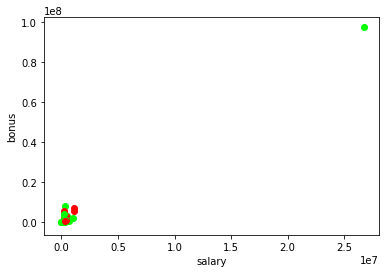

In [7]:
from feature_format import featureFormat
from feature_format import targetFeatureSplit

feature_list = ["poi", "salary", "bonus"] 
nparray = featureFormat(dictionary, ['poi','salary','bonus'])

for key in range(len(nparray)):
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('bonus')
plt.xlabel('salary')   
plt.show()

After analysing the graph above we find that there is a 'TOTAL' field in the given data 
which sums all the rows of the specified column

In [8]:
dictionary.pop('TOTAL')

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

**Bonus-Total_Payments**

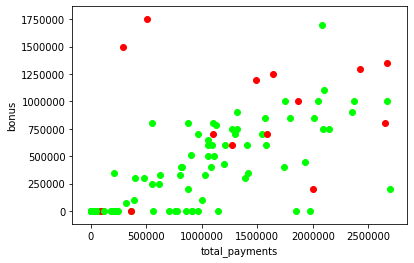

In [9]:
nparray = featureFormat(dictionary, ['poi','total_payments','bonus'])

for key in range(len(nparray)):
    if nparray[key][1]<3000000:  # to remove outliers
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('bonus')
plt.xlabel('total_payments')   
plt.show()

From this graph we can see those with bonus higher than 1000000 have a really
good chance of being a POI

kmeans clustering

In [10]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

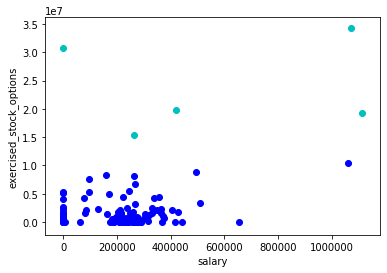

In [13]:
from sklearn.cluster import KMeans
data = featureFormat(dictionary, ['poi','salary','exercised_stock_options'])
value , features = targetFeatureSplit(data)
xtrain, xtest, ytrain, ytest = train_test_split(features, value, test_size = 0.2)

kmeans = KMeans(n_clusters=2).fit(features, value)
kmeans.labels_
pred = kmeans.predict(features, value)

Draw(pred, features, value, mark_poi=False, name="clusters2.pdf", f1_name="salary", f2_name="exercised_stock_options")

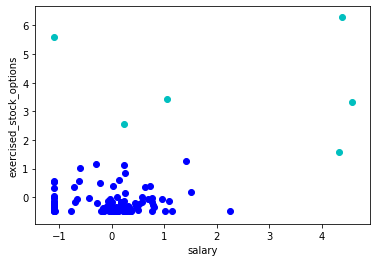

In [14]:
from sklearn import preprocessing
features_scaled = preprocessing.scale(features)
value_scaled = preprocessing.scale(value)

kmeans = KMeans(n_clusters=2).fit(features_scaled, value_scaled)
kmeans.labels_
pred = kmeans.predict(features_scaled, value_scaled)

Draw(pred, features_scaled, value_scaled, mark_poi=False, name="clustersscaled.pdf", f1_name="salary", f2_name="exercised_stock_options")

In [15]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**total stock value-deferred income**

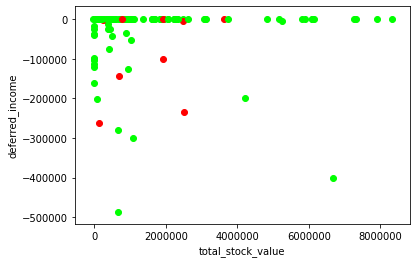

In [16]:
nparray = featureFormat(dictionary, ['poi','total_stock_value','deferred_income'])

for key in range(len(nparray)):
    if nparray[key][2]>-500000 and nparray[key][1]<10000000:  # to remove outliers
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('deferred_income')
plt.xlabel('total_stock_value')   
plt.show()

**from this person to POI-from POI to this person**

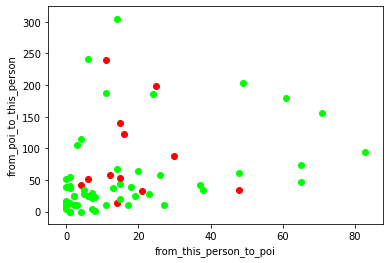

In [17]:
nparray = featureFormat(dictionary, ['poi','from_this_person_to_poi','from_poi_to_this_person'])

for key in range(len(nparray)):
    if nparray[key][1]<100:  # to remove outliers
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('from_poi_to_this_person')
plt.xlabel('from_this_person_to_poi')   
plt.show()

**shared receipt with poi-long term incentive**

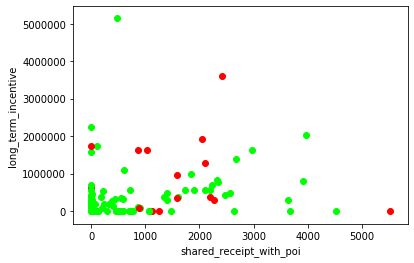

In [18]:
nparray = featureFormat(dictionary, ['poi','shared_receipt_with_poi','long_term_incentive'])

for key in range(len(nparray)):
    if nparray[key][2]<10000000:  # to remove outliers
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('long_term_incentive')
plt.xlabel('shared_receipt_with_poi')   
plt.show()

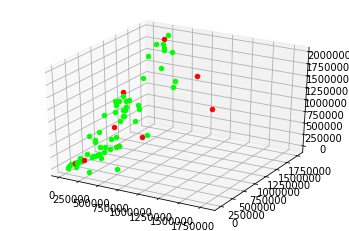

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nparray = featureFormat(dictionary, ['poi','restricted_stock','exercised_stock_options','total_stock_value'])

for key in range(len(nparray)):
    if nparray[key][3]<2000000 and nparray[key][1]>0:  # to remove outliers
        if nparray[key][0]==True:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='r')
        else:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='lime')
plt.show()

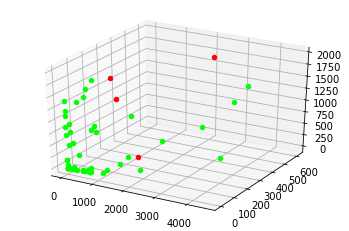

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nparray = featureFormat(dictionary, ['poi','shared_receipt_with_poi','from_this_person_to_poi','other'])

for key in range(len(nparray)):
    if nparray[key][3]<2000 and nparray[key][1]<5000:  # to remove outliers
        if nparray[key][0]==True:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='r')
        else:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='lime')
plt.show()

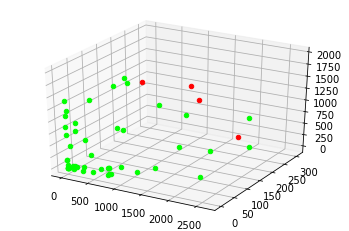

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nparray = featureFormat(dictionary, ['poi','shared_receipt_with_poi','from_poi_to_this_person','other'])

for key in range(len(nparray)):
    if nparray[key][3]<2000 and nparray[key][1]<3000:  # to remove outliers
        if nparray[key][0]==True:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='r')
        else:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='lime')
plt.show()

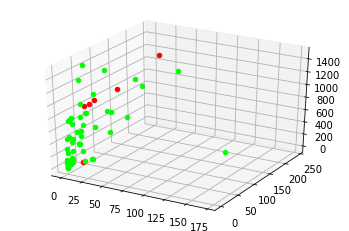

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nparray = featureFormat(dictionary, ['poi','from_this_person_to_poi','from_poi_to_this_person','shared_receipt_with_poi'])

for key in range(len(nparray)):
    if nparray[key][1]<500 and nparray[key][3]<1500:  # to remove outliers
        if nparray[key][0]==True:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='r')
        else:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='lime')
plt.show()

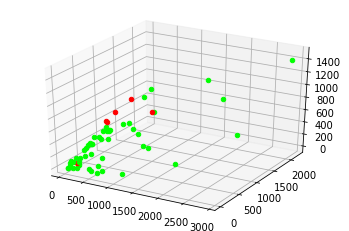

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nparray = featureFormat(dictionary, ['poi','to_messages','from_messages','shared_receipt_with_poi'])

for key in range(len(nparray)):
    if nparray[key][3]<1500 and nparray[key][2]<6000:  # to remove outliers
        if nparray[key][0]==True:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='r')
        else:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='lime')
plt.show()

## Trying out new features

In [24]:
def dict_to_list(key,normalizer):
    new_list=[]

    for i in dictionary:
        if dictionary[i][key]=="NaN" or dictionary[i][normalizer]=="NaN":
            new_list.append(0.)
        elif dictionary[i][key]>=0:
            new_list.append(float(dictionary[i][key])/float(dictionary[i][normalizer]))
    return new_list

fraction_exercised_stock_options=dict_to_list("exercised_stock_options","total_stock_value")
fraction_restricted_stock=dict_to_list("restricted_stock","total_stock_value")
j = 0
for i in dictionary:
    dictionary[i]["fraction_exercised_stock_options"]=fraction_exercised_stock_options[j]
    dictionary[i]["fraction_restricted_stock"]=fraction_restricted_stock[j]
    j+=1
    

fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")
j = 0
for i in dictionary:
    dictionary[i]["fraction_from_poi_email"]=fraction_from_poi_email[j]
    dictionary[i]["fraction_to_poi_email"]=fraction_to_poi_email[j]
    j+=1

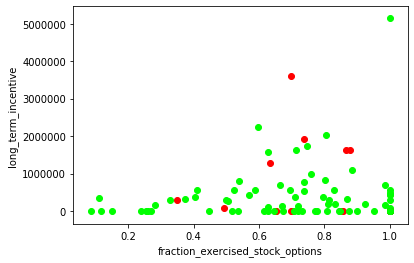

In [25]:
nparray = featureFormat(dictionary, ['poi','fraction_exercised_stock_options','long_term_incentive'])

for key in range(len(nparray)):
    if nparray[key][2]<10000000 and nparray[key][1]>0:
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('long_term_incentive')
plt.xlabel('fraction_exercised_stock_options')   
plt.show()

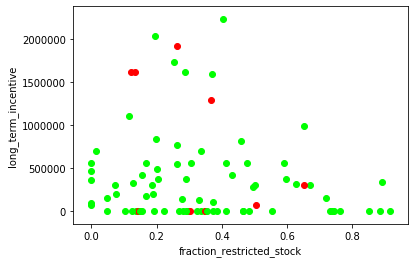

In [26]:
nparray = featureFormat(dictionary, ['poi','fraction_restricted_stock','long_term_incentive'])

for key in range(len(nparray)):
    if nparray[key][1]<1 and nparray[key][2]<3000000:
        if nparray[key][0]==True:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'r')
        else:
            plt.scatter(nparray[key][1],nparray[key][2],color = 'lime')

plt.ylabel('long_term_incentive')
plt.xlabel('fraction_restricted_stock')   
plt.show()

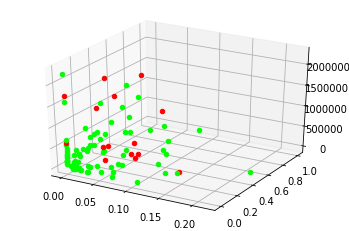

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nparray = featureFormat(dictionary, ['poi','fraction_from_poi_email','fraction_to_poi_email','long_term_incentive'])

for key in range(len(nparray)):
    if nparray[key][3]<3000000 and nparray[key][1]<1:  # to remove outliers
        if nparray[key][0]==True:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='r')
        else:
            ax.scatter(nparray[key][1],nparray[key][2], nparray[key][3], zdir='z', s=20, c='lime')
plt.show()

## Making predictions using different classifiers

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

**Making feature lists and scaling data**

In [29]:
features_list = ['poi','salary','bonus','fraction_from_poi_email','fraction_to_poi_email'
                 ,'fraction_exercised_stock_options','fraction_restricted_stock','shared_receipt_with_poi','long_term_incentive']
data = featureFormat(dictionary, features_list)
value , features = targetFeatureSplit(data)
xtrain, xtest, ytrain, ytest = train_test_split(features, value, test_size = 0.2)

xtrain_scaled = preprocessing.scale(xtrain)
xtest_scaled = preprocessing.scale(xtest)
  
print(xtrain_scaled[0:5, :]) 

[[-1.09058716 -0.6053096  -0.68801199 -0.59511787  1.15188225 -0.87933829
  -0.69451721  0.16243965]
 [ 0.44209697  0.03717328 -0.68801199 -0.59511787 -0.15723232  0.18773394
  -0.71650626 -0.07135835]
 [ 0.27591577  0.67965617  0.26466431  2.80078452  0.80422205 -0.59595703
   0.27300116  1.88139448]
 [-1.09058716 -0.6053096  -0.68801199 -0.41667965 -1.45275109 -0.87933829
  -0.27385705 -0.5249524 ]
 [ 0.35563355 -0.00565891 -0.25314198  1.17517711 -1.45275109  1.2437241
   1.73575125  0.18407579]]


**Logistic Regression**

In [30]:
lr = LogisticRegression(random_state = 0) 
grid = {'C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
grid_lr = GridSearchCV(lr,param_grid=grid,scoring='accuracy',cv=5)
grid_lr.fit(xtrain_scaled,ytrain) 

print(grid_lr.best_params_)
pred = grid_lr.predict(xtest_scaled)
print('Test Accuracy = ', grid_lr.score(xtest_scaled,ytest))
print(metrics.classification_report(ytest, pred, zero_division=0))

{'C': 0.01}
Test Accuracy =  0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        24
         1.0       0.00      0.00      0.00         3

    accuracy                           0.89        27
   macro avg       0.44      0.50      0.47        27
weighted avg       0.79      0.89      0.84        27



**Random Forest Classifier**

In [31]:
rf = RandomForestClassifier(n_estimators=200)
grid = {'n_estimators':[1, 10, 50],'max_depth':[25,30,35,40,45,50]}
grid_rf = GridSearchCV(rf,param_grid=grid,scoring='accuracy',cv=5)
grid_rf.fit(xtrain_scaled,ytrain)

print(grid_rf.best_params_)
pred = grid_rf.predict(xtest_scaled)
print('Accuracy = ',grid_rf.score(xtest_scaled,ytest))
print(metrics.classification_report(ytest,pred, zero_division = 0))

{'max_depth': 25, 'n_estimators': 10}
Accuracy =  0.9259259259259259
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       1.00      0.33      0.50         3

    accuracy                           0.93        27
   macro avg       0.96      0.67      0.73        27
weighted avg       0.93      0.93      0.91        27



**Support Vector Machine**

In [32]:
svmclassifier = svm.SVC()

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_svm = GridSearchCV(svmclassifier, tuned_parameters)
grid_svm.fit(xtrain_scaled, ytrain)

print(grid_svm.best_params_)
pred = grid_svm.predict(xtest_scaled)
print('Accuracy = ',grid_svm.score(xtest_scaled,ytest))
print(metrics.classification_report(ytest,pred, zero_division = 0))

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy =  0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        24
         1.0       0.00      0.00      0.00         3

    accuracy                           0.89        27
   macro avg       0.44      0.50      0.47        27
weighted avg       0.79      0.89      0.84        27



**AdaBoost Classifier**

In [33]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],"base_estimator__splitter":["best", "random"], "n_estimators": [1, 2]}
grid_ada = GridSearchCV(ada, param_grid=param_grid, scoring = 'accuracy', cv=5)
grid_ada.fit(xtrain_scaled, ytrain)

print(grid_ada.best_estimator_)
pred = grid_ada.predict(xtest_scaled)
print('Accuracy = ',grid_ada.score(xtest_scaled,ytest))
print(metrics.classification_report(ytest,pred, zero_division = 0))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [34]:
pickle.dump(rf, open("my_classifier.pkl", "wb") )
pickle.dump(dictionary, open("my_dataset.pkl", "wb") )
pickle.dump(features_list, open("my_feature_list.pkl", "wb") )